# **Introduction**
---

📷🔍 **Image classification** uses **visual features** to assign a **category to an image via machine learning** on a **labeled dataset**. During training, the **model learns** to **recognize patterns** for **each category**. The model is **tested and fine-tuned** to **improve accuracy**, then used to **classify new images**. This technology has **practical applications** in fields like **🚗 autonomous driving, 🩺 medical imaging, 🔒 security, and 🔎 surveillance**, improving **system efficiency and decision-making**.



## **Transfer Learning**
---

🤖💻 **Transfer learning** uses a **pre-trained model** as a **starting point** for a **new task 🆕,** leveraging **learned features and knowledge**. **Pre-training** involves **training on a large dataset 🗃️** to **learn general features**, which can be used for a **new task** like **image classification 🧊.** This **saves time and resources** when data is **limited**. **Transfer learning** can be applied **via fine-tuning or feature extraction**. **Practical applications** include **computer vision 📷, natural language processing 🗣️, and speech recognition 👂, improving machine learning system 💻 performance and efficiency.🚀**

## **About Dataset**
---

🍎🍌🍇🥭🍓 The **fruit classification** dataset is a **collection of 10,000 images** of various fruits, including **Apples, Bananas, Grapes, Mangoes, and Strawberries**. The images have different **shapes, sizes, and colors**, and have been captured under **different lighting conditions**. This dataset is ideal for **training and testing computer vision models for tasks such as object detection, image classification, and segmentation.** 🖼️👨‍💻

📊📉 The **dataset is split into three sets**: **training, validation, and testing**, with a ratio of **97%, 2%, and 1%** respectively. Each class is also split into **three sets to ensure a consistent distribution of classes across all sets. 💻🧐**

👨‍💻🐍 The **Python script** provided with the dataset can be used to create the **train, validation, and test sets** by **shuffling the images and moving them to their respective directories.** **Researchers and developers** can use this **dataset** for **various research projects**, including developing and **testing new image classification algorithms and benchmarking existing ones**. The dataset can also be used to **train machine learning models** for **real-world applications** such as **fruit grading and sorting in the agricultural industry.** 🚀🍎

# **Set Up⚒️**

---

👉 Here, we will focus on importing **all the necessary modules** required for the **functioning of the notebook**, as well as **declaring some constants** and **hyperparameters** for **data loading, data preprocessing, model architecture, and model training**. 👀 The aim is to ensure that the **notebook runs smoothly** and that all the **required modules and parameters are correctly set up.** 📝 In terms of **data loading**, we will define the **file paths** and **batch sizes** to be used, along with any **necessary data augmentation techniques.**

In [ ]:
# Common imports
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from typing import Tuple, List

# Data Imports
import pandas as pd
from tqdm import tqdm
from glob import glob
from tensorflow import data as tfd
from tensorflow import image as tfi

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import clear_output as cls

# Model Architecture
from tensorflow.keras import Sequential
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

# Model Training
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Model Hypertunning
!pip install -q keras_tuner
cls()
import keras_tuner as kt

In [ ]:
# Constants
IMAGE_SIZE = 160 # size of the input image
BATCH_SIZE = 32 # number of samples per gradient update
EPOCHS = 50 # number of epochs to train the model

# Hyperparameters
LEARNING_RATE = 1e-3 # learning rate for the optimizer

# Specify the directory paths for the data
root_dir = "/kaggle/input/fruits-classification/Fruits Classification/"
train_dir = f"{root_dir}train/" # path to the directory containing training data
# train_dir = f"train/" # path to the directory containing training data
valid_dir = f"{root_dir}valid/" # path to the directory containing validation data
# valid_dir = f"valid/" # path to the directory containing validation data
test_dir = f"{root_dir}test/" # path to the directory containing test data
# test_dir = f"test/" # path to the directory containing test data

# Model training
LOSS = 'sparse_categorical_crossentropy'
METRICS = ['accuracy']

# Random Seed
random_seed = 42 # set random seed for reproducibility
tf.random.set_seed(random_seed) # set random seed for TensorFlow
np.random.seed(random_seed) # set random seed for NumPy

# **Data Loading 📥**
---

🔍 Now that we have made all the **necessary imports** which are required for **loading the data**, it's time to **actually load the data into memory** so that we can **perform further operations on it**. 📂

💾 Loading the data into **memory is an essential step** in the **data processing pipeline**, and it involves **reading the data** from the **disk and storing it in a format that can be easily accessed** by the model. This step is critical as it sets the **foundation for all the subsequent steps** in the **data pipeline**. 🚀

📈 In addition, the way we load the **data can have a significant impact** on the **performance of the model**. Therefore, it's essential to make sure that we **load the data efficiently** and in a way that is **suitable for the problem at hand.** 💡

📥 To **load the data into memory**, we need to create **two functions** - one that can **read an image file and convert it into a tensor**, and another that can create a **TensorFlow dataset** for us. These functions will help us **streamline the data loading process** and **make it easier to work with the data**.

In [ ]:
# Collect the class names
class_names = sorted(os.listdir(train_dir))
n_classes = len(class_names)

# Show
print(f"Total number of classes: {n_classes}")
print(f"Classes: {class_names}")

For loading the data into memory we need a function that will iterate(loop) over all the given image paths and will load them and finally convert them into Tensorflow Dataset.

In [ ]:
def load_image(image_path: str) -> tf.Tensor:
    
    '''
    The task of the function is to load the image present in the specified given image path. Loading the image the function also performed some 
    preprocessing steps such as resizing and normalization.
    
    Argument:
        image_path(str) : This is a string which represents the location of the image file to be loaded.
        
    Returns:
        image(tf.Tensor) : This is the image which is loaded from the given image part in the form of a tensor.
    '''
    
    # Check if image path exists
    assert os.path.exists(image_path), f'Invalid image path: {image_path}'
    
    # Read the image file
    image = tf.io.read_file(image_path)
    
    # Load the image
    try:
        image = tfi.decode_jpeg(image, channels=3)
    except:
        image = tfi.decode_png(image, channels=3)
    
    # Change the image data type
    image = tfi.convert_image_dtype(image, tf.float32)
    
    # Resize the Image
    image = tfi.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    
    # Convert image data type to tf.float32
    image = tf.cast(image, tf.float32)
    
    return image

In [ ]:
def load_dataset(root_path: str, class_names: list, trim: int=None) -> Tuple[np.ndarray, np.ndarray]:
    '''
    Load and preprocess images from the given root path and return them as numpy arrays.

    Args:
        root_path (str): Path to the root directory where all the subdirectories (class names) are present.
        class_names (list): List of the names of all the subdirectories (class names).
        trim (int): An integer value used to reduce the size of the data set if required.

    Returns:
        Two numpy arrays, one containing the images and the other containing their respective labels.
    '''
    
    if trim:
        # Trim the size of the data
        n_samples = len(class_names) * trim
    else:
        # Collect total number of data samples
        n_samples = sum([len(os.listdir(os.path.join(root_path, name))) for name in class_names])

    # Create arrays to store images and labels
    images = np.empty(shape=(n_samples, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
    labels = np.empty(shape=(n_samples, 1), dtype=np.int32)

    # Loop over all the image file paths, load and store the images with respective labels
    n_image = 0
    for class_name in tqdm(class_names, desc="Loading"):
        class_path = os.path.join(root_path, class_name)
        image_paths = list(glob(os.path.join(class_path, "*")))[:trim]
        for file_path in image_paths:
            # Load the image
            image = load_image(file_path)

            # Assign label
            label = class_names.index(class_name)

            # Store the image and the respective label
            images[n_image] = image
            labels[n_image] = label

            # Increment the number of images processed
            n_image += 1

    # Shuffle the data
    indices = np.random.permutation(n_samples)
    images = images[indices]
    labels = labels[indices]
    

    return images, labels

👏🎉 Awesome work on **creating the necessary functions** for loading the data! 👨‍💻 Now, it's time to proceed to the next step, which is loading the **training, validation, and testing data into memory**. 📥

To accomplish this, we will utilize the `load_dataset()` function that we created earlier, passing in the **appropriate parameters** for each of the **data sets.** By doing this, we will **load and preprocess all of the images**, and then convert them into a **TensorFlow dataset** that can be used for **training, validation, and testing.** 🚀

Once the data has been loaded, we can move on to the **next stage of our project**, which **involves building and training our deep learning model!** 🧠💪

In [ ]:
# Load the training dataset
X_train, y_train = load_dataset(root_path = train_dir, class_names = class_names, trim=1000)  # 1000 images per class

# # Load the validation dataset
X_valid, y_valid = load_dataset(root_path = valid_dir, class_names = class_names)

# Load the testing dataset
X_test, y_test = load_dataset(root_path = test_dir, class_names = class_names)

# **Data Distribution 📊**
---

👀Before we move forward, let's take a moment to **examine the class distribution 🧩** of our **training data**. 🕵️‍ **Class distribution** plays a **critical role** in both the **model training process ⚙️** and **our overall understanding of the dataset**. If the **data is imbalanced**, with some **classes having significantly more samples** than others, **our model's results may be similarly imbalanced** and **biased towards the more heavily populated classes**. 🤔 Therefore, it's important to be **aware of any imbalances** in our data and take **appropriate steps to address them**, such as **data augmentation or resampling techniques.**

In [ ]:
# Calculate class distribution
class_dis = [len(os.listdir(train_dir + name)) for name in class_names]

# Visualize using interactive pie chart
pie_chart = px.pie(values=class_dis, names=class_names, color=class_names)
pie_chart.update_layout({'title':{'text':"Class Distribution"}})
pie_chart.show()

# Visualize using interactive bar chart
bar_chart = px.bar(y=class_dis, x=class_names, color=class_names)
bar_chart.show()

📈 When we **plot the distribution of classes**, it is crucial to **ensure** that **all classes** have an **equal number of images**. This helps prevent **bias towards any particular class**, as **no class** is **overly represented** or **underrepresented compared** to the others.

💡 To achieve this, we are utilizing **only 1000 images per class** during the **training phase** instead of using the **full 2000 images per class**. While this approach helps **manage RAM and memory**, it does **not significantly impact model performance.** This is because **deep learning models** are **robust and can effectively learn** even from a **limited number of training images**.

# **Data Visualization 📈📉**
---

🎨 Let's dive into the next step! Our task now is to create a function that can be used to **visualize the images** present in the data. This function will serve a **dual purpose** 🤹‍, being used **not only during data visualization 📊** but also **during inference**. This means that by using this function, we will be able to **visually analyze the model's predictions** 🔮.

By plotting the **images** present in the dataset, we can gain a **deeper understanding** of the **characteristics of the data and identify any patterns or outliers that might impact our model's performance** 📑. Additionally, by visualizing the **model's predictions** alongside the **actual images** 🌌, we can **evaluate the model's accuracy** and **identify any potential errors or misclassifications**.

Therefore, this **function plays a critical role** in both the **model development and evaluation process.** So, let's get started with creating the **function and unleash the power of data visualization! 🚀**

In [ ]:
def show_images(images: np.ndarray, labels: np.ndarray, n_rows: int=1, n_cols: int=5, figsize: tuple=(25, 8), model: tf.keras.Model=None) -> None:
    """
    Plots a grid of random images and their corresponding labels, with an optional prediction from a given model.

    Args:
        images (np.ndarray): Array of images to plot.
        labels (np.ndarray): Array of labels corresponding to the images.
        n_rows (int): Number of rows in the plot grid. Default is 1.
        n_cols (int): Number of columns in the plot grid. Default is 5.
        figsize (tuple): A tuple specifying the size of the figure. Default is (25, 8).
        model (tf.keras.Model): A Keras model object used to make predictions on the images. Default is None.

    Returns:
        None
    """

    # Loop over each row of the plot
    for row in range(n_rows):
        # Create a new figure for each row
        plt.figure(figsize=figsize)

        # Generate a random index for each column in the row
        rand_indices = np.random.choice(len(images), size=n_cols, replace=False)

        # Loop over each column of the plot
        for col, index in enumerate(rand_indices):
            # Get the image and label at the random index
            image = images[index]
            label = class_names[int(labels[index])]

            # If a model is provided, make a prediction on the image
            if model:
                prediction = model.predict(np.expand_dims(tf.squeeze(image), axis=0), verbose=0)[0]
                conf = np.max(prediction, axis=-1)
                label += "\nPrediction: {} - {:.4}".format(class_names[np.argmax(prediction)], conf)

            # Plot the image and label
            plt.subplot(1, n_cols, col+1)
            plt.imshow(image)
            plt.title(label.title())
            plt.axis("off")

        # Show the row of images
        plt.show()

In [ ]:
# Visualize Training Dataset
show_images(images=X_train, labels=y_train, n_rows=5)

# **Backbone Analysis 🪁🪬**
---

👨‍💻 In this section, we aim to **compare different backbone architectures 🏗️** to determine which **one performs best on our dataset ✨**.

📈 To accomplish this, we will **first collect a small subset** of the **data and train a basic model architecture on it**. We will then analyze the **performance of these backbones and identify the top three or four best ones 📉**.

🧐 Once we have **identified the best backbone architectures**, we will **fine-tune their hyperparameters 🔎** to determine the **best model architecture 🏗️** that will work for the **entire dataset 🗄️**. This approach will help us to **select the best-performing 🔮 model for our image classification task 👀**.

In [ ]:
# # Name all the backbones
# backbone_names = [
#     'ResNet50V2',
#     'ResNet152V2',
#     'InceptionV3',
#     'Xception',
#     'MobileNetV2'
# ]

# # Load all the backbones
# backbones = [
#     ResNet50V2(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
#     ResNet152V2(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
#     InceptionV3(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
#     Xception(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
#     MobileNetV2(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
# ]

# # Freeze the weights of all the backbones
# for backbone in backbones:
#     backbone.trainable = False

🤖🏗️ To ensure an **impartial and well-informed selection** of a suitable **backbone architecture**, let us construct a **concise model** with a **uniform architecture across all the backbones**. Such a model will enable us to evaluate each **backbone's efficacy without prejudice towards any particular architecture**. By doing so, we can **harness** the **power of deep learning techniques and minimize any potential biases in our selection process. 🧐💡**

In [ ]:
# # Record the learing curve for all the backbones
# HISTORIES = {}

# # Loop over all the backbones
# for name, backbone in zip(backbone_names, backbones):
    
#     # Show
#     print(f"Training: {name}\n")
    
#     # Make a small model
#     model = Sequential([
#         backbone,
#         GlobalAveragePooling2D(),
#         Dropout(0.5),
#         Dense(n_classes, activation='softmax')
#     ])
    
#     # Compile the model
#     model.compile(
#         loss=LOSS,
#         optimizer=Adam(LEARNING_RATE),
#         metrics=METRICS
#     )
    
#     # Train the model
#     model_history = model.fit(
#         X_train[:5000], y_train[:5000],
#         validation_data=(X_valid, y_valid),
#         epochs=10,
#         batch_size=BATCH_SIZE
#     )
    
#     # Store the history
#     HISTORIES[name] = model_history.history
#     cls()

🎓💻🔍 After putting in the **effort to train** our **neural networks** using **multiple backbones**, it's time to evaluate their **performance and determine which one performed the best** 🏆💪. We will **compare each of the backbones** using various **metrics** such as **accuracy, precision, and recall**. These metrics will give us insights into the **overall performance of each backbone**. Once we have **analyzed the metrics**, we can determine the **best backbone** that gave the **best results**. This will help us make an **informed decision** about which **backbone to use in our final model.**

So let's dive in and compare our backbones to find out which one is the champion! 🚀🔬🧐

In [ ]:
# # Loop over the model training curves
# for name, history in HISTORIES.items():
    
#     # Create a new figure for each backbone
#     plt.figure(figsize=(20,5))
    
#     # Plot the loss curve in the first subplot
#     plt.subplot(1, 2, 1)
#     plt.title(f"{name} - Loss Curve")
#     plt.plot(history['loss'], label="Training Loss")
#     plt.plot(history['val_loss'], label="Validation Loss")
    
#     # Plot a vertical line at epoch 9 and annotate the difference between the validation loss and the training loss
#     plt.plot([9, 9],[min(history['loss']), min(history['val_loss'])], linestyle='--', marker="*", color='k', alpha=0.7)
#     plt.text(x=9.1, y=np.mean([min(history['loss']), min(history['val_loss'])]), s=str(np.round(min(history['val_loss']) - min(history['loss']),3)), fontsize=15, color='b')
    
#     # Plot a horizontal line at epoch 9 and annotate the values for the validation loss and training loss.
#     plt.axhline(min(history['loss']), color='g', linestyle="--", alpha=0.5)
    
#     # Set the x- and y-labels, and the x- and y-limits
#     plt.xlabel("Epochs")
#     plt.ylabel("Cross Entropy Loss")
#     plt.ylim([0.2, 0.8])
#     plt.xlim([5, 10])
    
#     # Show the legend and grid
#     plt.legend()
#     plt.grid()
    
#     # Plot the accuracy curve in the second subplot
#     plt.subplot(1, 2, 2)
#     plt.title(f"{name} - Accuracy Curve")
#     plt.plot(history['accuracy'], label="Training Accuracy")
#     plt.plot(history['val_accuracy'], label="Validation Accuracy")
    
#     # Plot a vertical line at epoch 9 and annotate the difference between the validation accuracy and the training accuracy
#     plt.plot([9, 9],[max(history['accuracy']), max(history['val_accuracy'])], linestyle='--', marker="*", color='k', alpha=0.7)
#     plt.text(x=9.1, y=np.mean([max(history['accuracy']), max(history['val_accuracy'])]), s=str(np.round(max(history['accuracy']) - max(history['val_accuracy']),3)), fontsize=15, color='b')
    
#     # Set the x- and y-labels, and the x- and y-limits
#     plt.xlabel("Epochs")
#     plt.ylabel("Accuracy")
#     plt.ylim([0.7,0.9])
#     plt.xlim([5, 10])
    
#     # Show the legend and grid
#     plt.legend()
#     plt.grid()
    
#     # Show the plot
#     plt.show()

💡 The **first observation** we can make is that except for **MobileNetV2**, none of the other models achieved an **accuracy higher than 85%**. This suggests that **MobileNetV2** is the **most effective model** among the ones tested.

💻 Furthermore, we can see that the **MobileNetV2** model has the **best performance** with **a negative(graph) loss**. This implies that its **validation loss is significantly lower than its training loss**, and its **validation accuracy is much higher than its training accuracy**. These results demonstrate that **MobileNetV2** is the **optimal backbone for this particular dataset**.

📈 Despite the other models not being able to perform as well as **MobileNetV2**, they still achieved a **robust performance**. The **difference between their validation and training loss and accuracy was not significantly higher**. This is a **positive indication** because it implies that **almost every backbone was able to accurately capture the visual features present in the dataset**.

👀 Overall, these observations help us identify the best performing model and understand the performance of other models on the dataset. Which in this case if **MobileNetV2**.

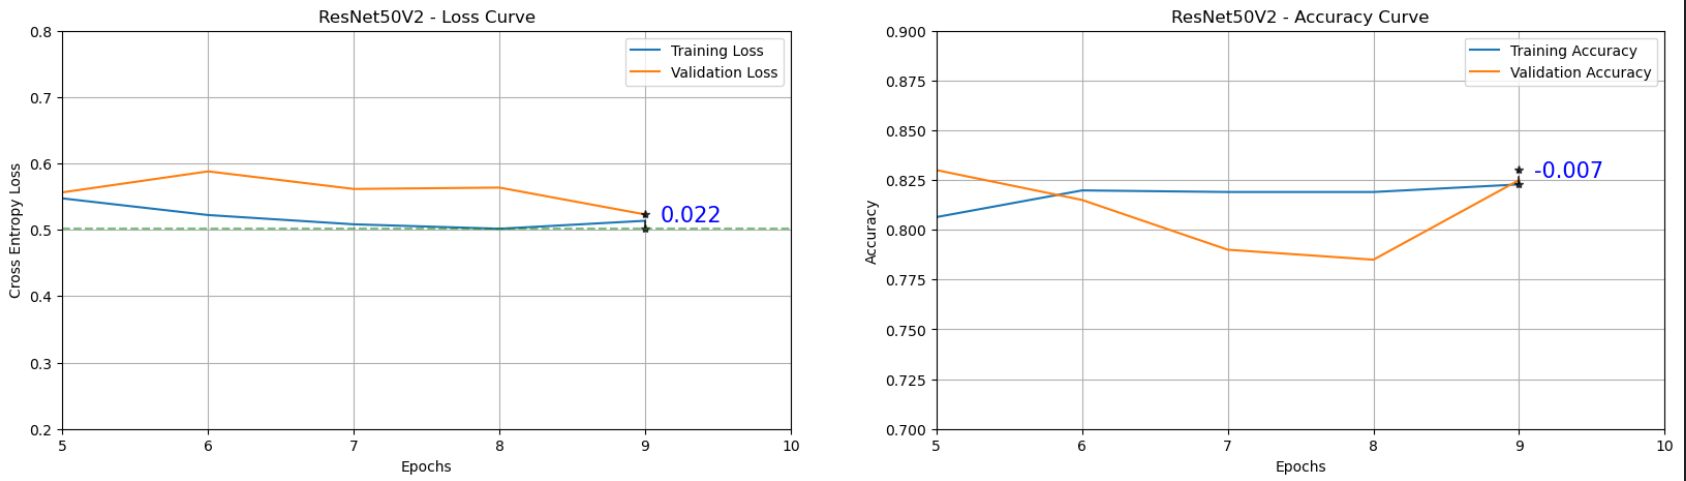
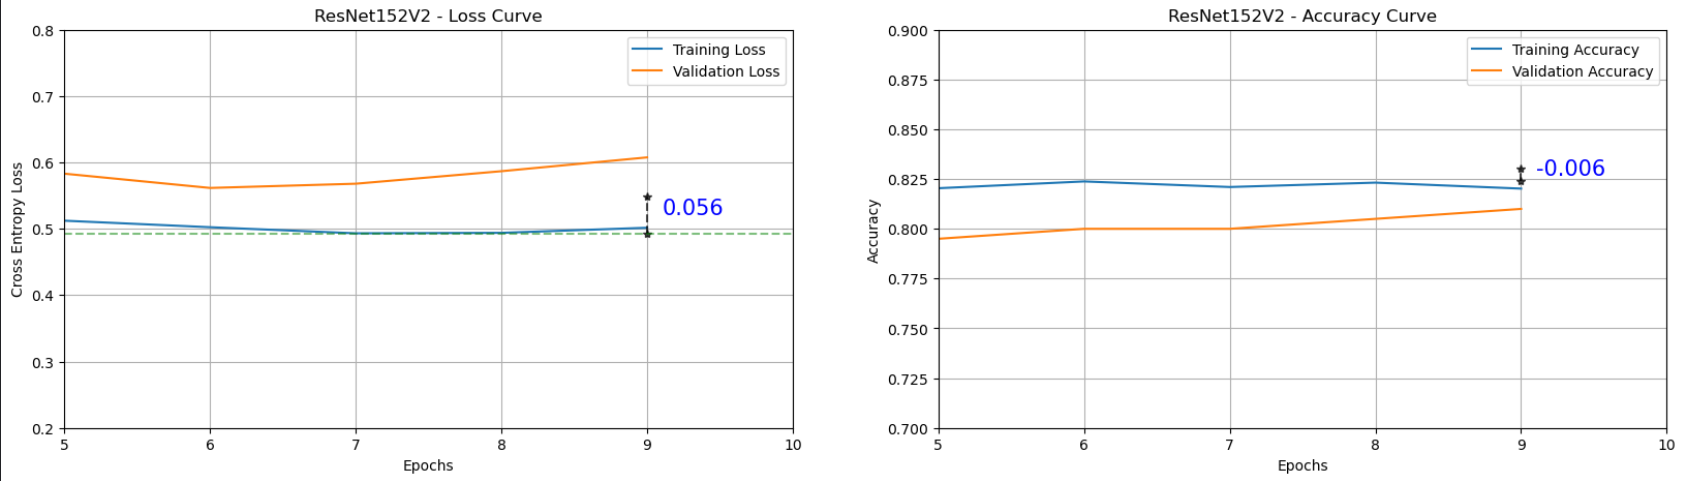
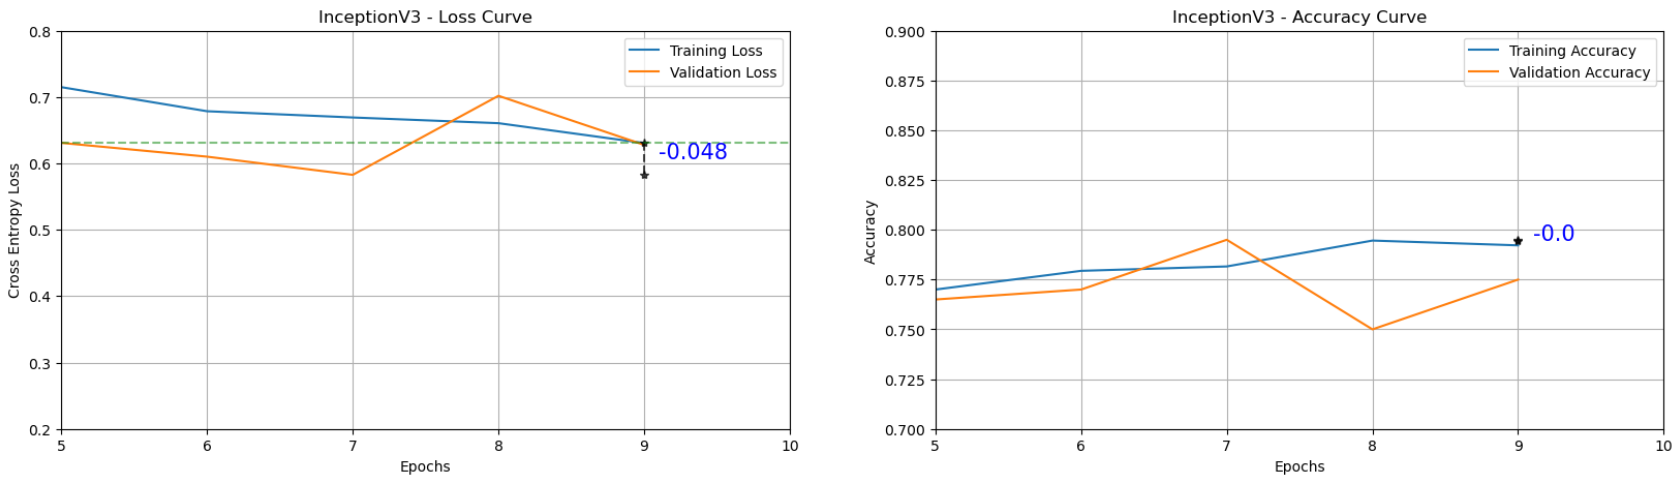
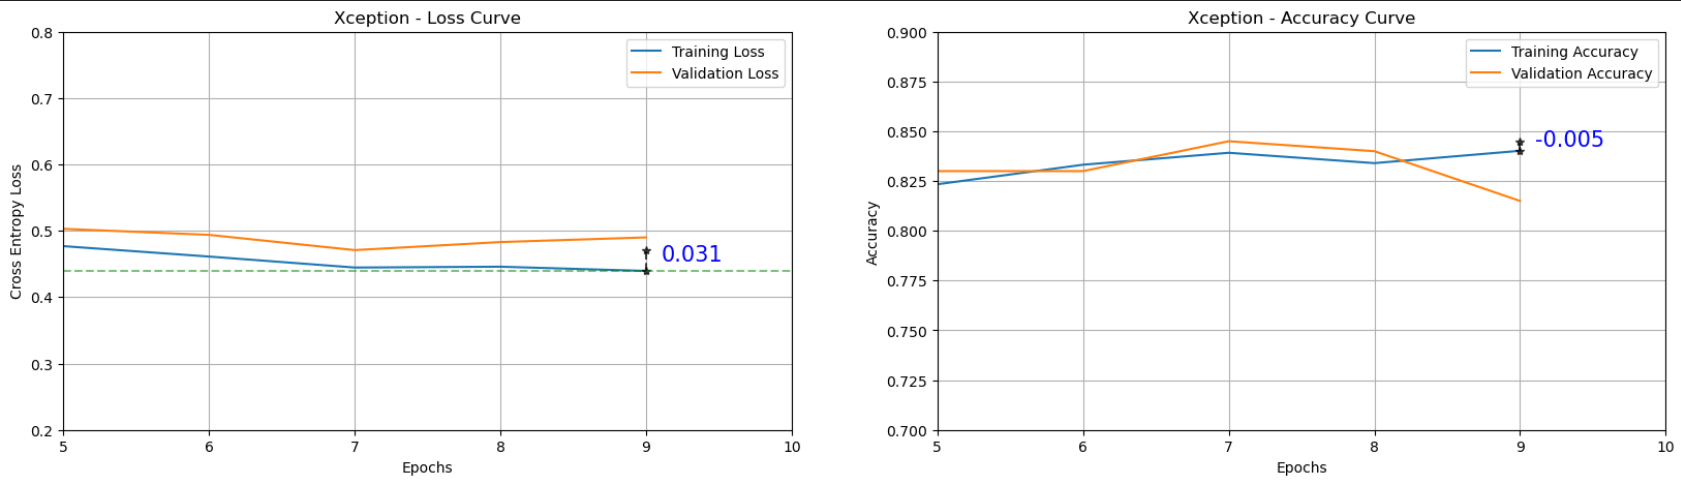
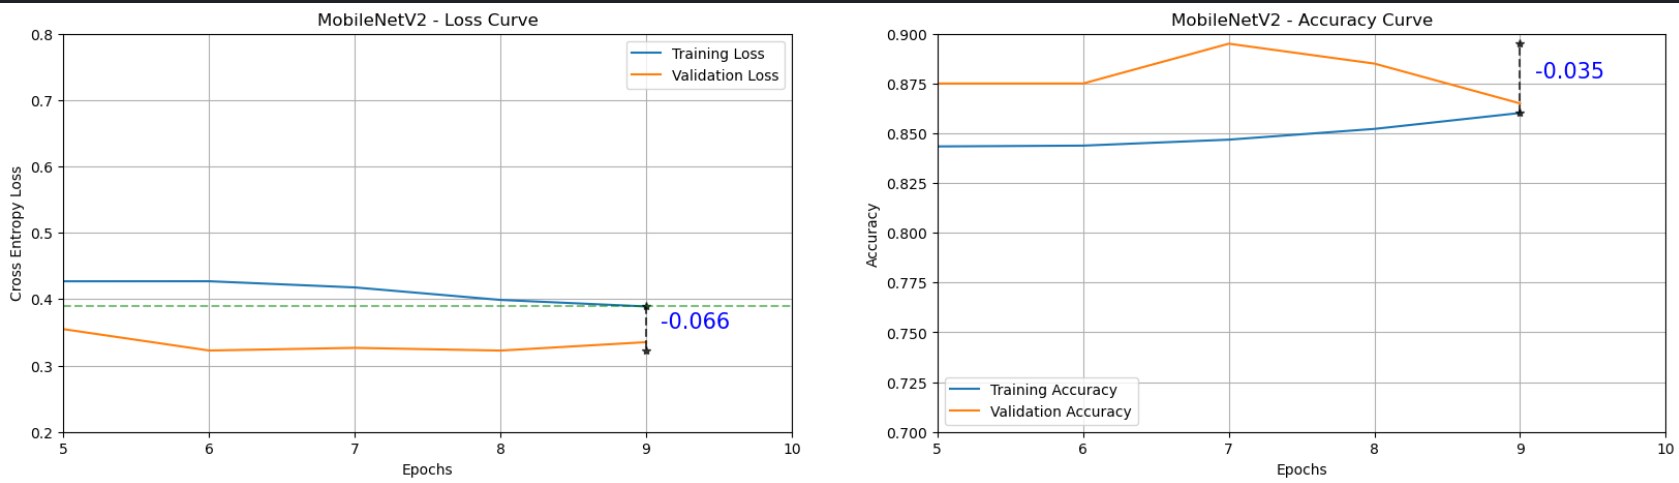

# **MobileNetV2 Hypertuning🚀**

---

🔍 Let's shift our focus towards finding the **optimal model architecture** for the **MobileNetV2 backbone**. Our aim here is to **hyperparameter tune** the **total number of layers**, units present in **each layer,** and the **dropout rate**.

💡These **hyperparameters** play a **crucial role** in **improving the performance** of our model by **enhancing its ability** to **generalize and reduce overfitting**. Therefore, we will **perform an extensive search** for the **best possible combination** of these **hyperparameters** to achieve **optimal accuracy** on our **testing data**.

🚀 Let's get started and **explore various combinations** of **hyperparameters** to find the **best model architecture for MobileNetV2**!

In [ ]:
# Mobilenet Backbone
print("Loading MobileNet Backbone: ")
mobilenet = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', include_top=False)

# Freeze the model weights
mobilenet.trainable = False

# The Mobilenet Model baseline
mobilenet = Sequential([
    mobilenet,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

# Compile the Baseline
mobilenet.compile(
    loss=LOSS,
    optimizer=Adam(learning_rate=LEARNING_RATE),
    metrics=METRICS
)

# Train the Xception Baseline Model
print("\nTraining Baseline Model: ")
mobilenet.fit(
    X_train, y_train, 
    validation_data=(X_valid, y_valid), 
    epochs=50, 
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True),
        ModelCheckpoint("MobileNetV2Baseline.h5", save_best_only=True)
    ],
    batch_size=BATCH_SIZE
)

# Testing Evaluation
mobilenet_test_loss, mobilenet_test_acc = mobilenet.evaluate(X_test, y_test)
print(f"\nMobileNet Baseline Testing Loss     : {mobilenet_test_loss}.")
print(f"MobileNet Baseline Testing Accuracy : {mobilenet_test_acc}.")

📈 The **baseline model** we are working with is the **MobileNetV2 architecture.** It includes a **global average pooling layer**, **a dropout layer** with a **rate of 0.5**, and a **dense layer** with **softmax activation** to **classify the data into n_classes.**

👀 From the results, we can observe that the **training accuracy is 84%,** the **validation accuracy is 87%,** and the **maximum accuracy achieved is 90%.** However, the model **demonstrates robustness** with a **testing accuracy of 92%.** This indicates that the **model generalizes well to unseen data**.

🤔 As this is a **simple architecture**, it may or **may not be outperformed** by a **more complex architecture**. Therefore, our goal is to find the **best model architecture** for **MobileNetV2,** specifically by **hyperparameter tuning using Keras Tuner**.

🧪 We will be using the **random search method** from **Keras Tuner** to **explore various combinations** of **hyperparameters** and find the **best model architecture** for **this dataset**. This will allow us to **obtain the most accurate and robust model possible**.

🚀 Let's begin our search for the **optimal model architecture for MobileNetV2 using Keras Tuner!**

In [ ]:
def build_model(hp):
    
    # Define all hyperparms
    mobilenet = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', include_top=False)
    mobilenet.trainable = False
    n_layers = hp.Choice('n_layers', [2, 4])
    dropout_rate = hp.Choice('rate', [0.4, 0.7])
    n_units = hp.Choice('units', [256, 512])
    learning_rate = hp.Choice('lr', [LEARNING_RATE, LEARNING_RATE * 0.1, LEARNING_RATE*0.01])
    
    # Mode architecture
    model = Sequential([
        mobilenet,
        GlobalAveragePooling2D(),
    ])
    
    # Add hidden/top layers 
    for _ in range(n_layers):
        model.add(Dense(n_units, activation='relu', kernel_initializer='he_normal'))
    
    # Add Dropout Layer
    model.add(Dropout(dropout_rate))
    
    # Output Layer
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compile the model
    model.compile(
        loss=LOSS,
        optimizer = Adam(learning_rate),
        metrics = METRICS
    )
    
    # Return model
    return model

In [ ]:
# Initialize Random Searcher
random_searcher = kt.RandomSearch(
    hypermodel=build_model, 
    objective='val_loss', 
    max_trials=10, 
    seed=42, 
    project_name="MobileNetSearch", 
    loss=LOSS)

# Start Searching
search = random_searcher.search(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs = 10,
    batch_size = BATCH_SIZE
)

In [ ]:
# Best Hyper params
best_hps = random_searcher.get_best_hyperparameters()[0]
print(f"Best Hyper Params founded: {best_hps.values}\n")

# Build the best model
mobile_net_model = build_model(best_hps)
mobile_net_model.summary()

# Compile the model
print("\nTraining Best Model Architecture : ")
mobile_net_model_history = mobile_net_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
        ModelCheckpoint('BestMobileNet.h5', save_best_only=True)
    ]
)

In [ ]:
test_loss, test_acc = mobile_net_model.evaluate(X_test, y_test)
print("Training Loss    : {:.4} | Baseline : {:.4}".format(test_loss, mobilenet_test_loss))
print("Training Accuracy: {:.4}% | Baseline : {:.4}%".format(test_acc*100, mobilenet_test_acc*100))

In [ ]:
# Collect the history of the training run
mobile_net_model_history = pd.DataFrame(mobile_net_model_history.history)

# Create a figure to display the model's performance
plt.figure(figsize=(20, 5))

# Plot the loss curve in the first subplot
plt.subplot(1, 2, 1)
plt.title("MobileNet - Loss Curve")
plt.plot(mobile_net_model_history['loss'], label="Training Loss")
plt.plot(mobile_net_model_history['val_loss'], label="Validation Loss")

# Horizontal line to show the testing performance
plt.axhline(y=test_loss, label="Test Loss", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.ylim([0, 0.4])

# Show the legend and grid
plt.legend()
plt.grid()

# Plot the accuracy curve in the second subplot
plt.subplot(1, 2, 2)
plt.title("MobileNet - Accuracy Curve")
plt.plot(mobile_net_model_history['accuracy'], label="Training Accuracy")
plt.plot(mobile_net_model_history['val_accuracy'], label="Validation Accuracy")

# Horizontal line to show the testing performance
plt.axhline(y=test_acc, label="Test Accuracy", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.85, 1])

# Show the legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()


🔍 Upon analyzing the **model training phase**, it appears that the **model may be overfitting** to the data, as the **training performance** is **significantly better** than the **validation performance**. This indicates a **potential issue** with the **model's ability to generalize well to new, unseen data**.

💡 To **address this**, we evaluated **the model's performance** on the **test set**, and the results **were completely opposite**. The **model exhibited significantly better performance** on the **test data** than on the **validation data** in terms of **both loss** and **accuracy**.

👍 This is an **indication** that the **model possesses** the **ability** to **generalize well** to **new cases**. It has a **slightly lower loss** and a **slightly higher accuracy,** suggesting that it is **robust and capable of working with higher complexity data**.

💪 With this **capability**, the **model** is **well-suited to perform well** on **newer data**, thereby enabling it to be **applied effectively in real-world scenarios**.

📈 It is evident that the **hyper-tuned model** outperforms the **baseline model** when we compare their **respective performances**. The **baseline model** had a **testing loss of 0.29**, while the hyper-tuned model achieved a **lower testing loss of 0.22**.

🎉 Additionally, the **baseline model** had a **testing accuracy of 91%,** whereas the **hyper-tuned model** achieved a **significantly higher testing accuracy of 95%,** representing a **4% increase**. Such a **considerable improvement** in **accuracy** is **both desirable and significant.**


# **Performance Measures 💯**
---

🔍📊 Instead of **solely** relying on **loss and accuracy**, it's **crucial** to **analyze** other **performance metrics** such as **precision, recall, F1 score, and a classification report** to **accurately evaluate model performance**. 

📈💻 These **metrics** provide a **more comprehensive understanding** of the **model's ability** to **classify correctly** and **identify any potential issues**.

In [ ]:
# Make predictions
baseline_pred = np.argmax(mobilenet.predict(X_test, verbose=0), axis=-1)
best_pred = np.argmax(mobile_net_model.predict(X_test, verbose=0), axis=-1)

# Evaluate prediction : Precision
baseline_pre = precision_score(y_test, baseline_pred, average='macro')
best_pre = precision_score(y_test, best_pred, average='macro')

# Evaluate prediction : Recall
baseline_recall = recall_score(y_test, baseline_pred, average='macro')
best_recall = recall_score(y_test, best_pred, average='macro')

# Evaluate prediction : F1 Score
baseline_f1 = f1_score(y_test, baseline_pred, average='macro')
best_f1 = f1_score(y_test, best_pred, average='macro')

print("{:20} | {:20}".format("Baseline Performance", "Best Performance\n"))
print("{:10} : {:.5}  | {:.5}".format("Precision", baseline_pre, best_pre))
print("{:10} : {:.5}    | {:.5}".format("Recall", baseline_recall, best_recall))
print("{:10} : {:.5} | {:.5}".format("F1 Score", baseline_f1, best_f1))

In [ ]:
print(classification_report(y_test, baseline_pred))

In [ ]:
print(classification_report(y_test, best_pred))

🚀 **Substantial improvement** in the **model performance 📈** is **clearly evident** when comparing the **results of the best model** with the **baseline model**. Not only have the **precision 🔎, recall 🔍, and F1 scores 📊 significantly improved**, but also the **classification report** which 📝 provides a **more comprehensive evaluation** of the **model's predictions**, including **precision, recall, F1 score, and support values for each sample.**

👀 It's apparent that the **best model outperforms** the **baseline model** with **precision and recall values** consistently above **95% and 100%,** respectively. Such **impressive performance** is indicative of the **model's ability** to **accurately predict** the **labels of the test set**, making it **highly desirable** and **reliable for real-world applications. 💯**

# **MobileNet Predictions 🔮**
---

👀 Let's take a **visual look 👀** at the **model's predictions** to gain a **better understanding** of its **performance.** Instead of **relying solely on mathematical descriptions**, visualizing the results will enable us to **evaluate the model more accurately**. By observing the **predictions visually**, we can make more **informed judgments about the model's efficacy 💯**

In [ ]:
show_images(images=X_test, labels=y_test, model=mobile_net_model, n_rows=20)

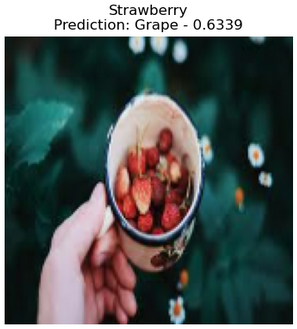

* 🤔 After examining the **model's prediction**, it is apparent that an **incorrect classification** was made. However, I stand by the **model's decision and acknowledge the difficulty** in making such a **determination. 🍓🍇** Distinguishing between a **strawberry and grapes** can be **challenging**, especially with **similarities in shape and texture**. Although the **strawberry** has a **slightly different structure and a unique appearance**, from a distance, it may appear **similar to grapes**. Additionally, the **color of the fruit** can also be a **determining factor**, and in this case, the red hue matches that of **red grapes**.

* 👍 Despite the **incorrect prediction**, I appreciate the **model's uncertainty** in its **prediction.** Similar to **humans**, the model did not have a **high level of confidence in its prediction**, which is an **important aspect of machine learning**. By recognizing the **limitations of the model**, we can **continue to refine and improve its performance. 🚀**

* 🤩 I was fascinated by the **model's ability** to distinguish between **green mangoes and green apples**. 🍏🥭 Despite their **overall similarity** in **appearance, **the model** was able to identify** the **distinct structural differences** between the **two fruits**, which is the **primary factor** that sets them apart. While **color alone may not be sufficient** to **distinguish between them**, the **model's ability** to recognize the **unique oval structure of mangoes played a key role in accurately identifying and classifying them**. 🙌

---

🙏 Thank you for taking the time to review my analysis. 📊 I have provided a comprehensive overview of my findings, and I welcome any feedback or comments you may have. 💬 Your input is valuable and will aid in the continued development and improvement of my work. Kindly share your opinions and suggestions in the comments section. 🤔👀 Thank you. 🙌

---
**DeepNets**